In [1]:
# from ipywidgets import HTML

import numpy
import pygal
import math

In [2]:
# Exact Solution where constants depends on (x_0, y_0)
def y_sol(x, x_0, y_0):
    c = (y_0 - x_0/2) / (x_0*math.exp(2*x_0))
    return x/2 + c*x*math.exp(2*x) 

# Right part of differential equation
def func(x, y):
    return -x + (y*(2*x+1)) / x


N = 1000       # Number of steps  
y_0 = 3        # IVP for x (start of interval)
x_0 = 1        # IVP for y
x_end = 18.2   # End of interval

## Analytical Solution

In [3]:
def calc_analytical(f, x_0, y_0, x_end, N):
    h = (x_end - x_0) / N
    xs = [x_0,]
    
    while xs[-1] < x_end: xs.append(xs[-1] + h)
    
    return (xs, [f(x, x_0, y_0) for x in xs])

## Euler`s Method

In [4]:
def calc_euler(f, x_0, y_0, x_end, N):
    h = (x_end - x_0) / N
    xs_e = [x_0,]
    ys_e = [y_0,]

    while xs_e[-1] < x_end:
        ys_e.append(ys_e[-1] + h * f(xs_e[-1], ys_e[-1]))
        xs_e.append(xs_e[-1] + h)
        
    return (xs_e, ys_e)

## Imrpoved Euler`s Method

In [5]:
def calc_improved_euler(f, x_0, y_0, x_end, N):
    h = (x_end - x_0) / N
    xs_ie = [x_0,]
    ys_ie = [y_0,]

    while xs_ie[-1] < x_end:
        ys_ie.append(ys_ie[-1] + h * f(xs_ie[-1] + h/2, ys_ie[-1] + (h/2)*f(xs_ie[-1], ys_ie[-1])))
        xs_ie.append(xs_ie[-1] + h)
        
    return (xs_ie, ys_ie)

## Runge–Kutta Method

In [6]:
def calc_runge_kutta(f, x_0, y_0, x_end, N):
    h = (x_end - x_0) / N

    xs_rk = [x_0,]
    ys_rk = [y_0,]

    while xs_rk[-1] < x_end:
        k1 = f(xs_rk[-1], ys_rk[-1])
        k2 = f(xs_rk[-1] + h/2, ys_rk[-1] + h*k1/2)
        k3 = f(xs_rk[-1] + h/2, ys_rk[-1] + h*k2/2)
        k4 = f(xs_rk[-1] + h, ys_rk[-1] + h*k3)
        ys_rk.append(ys_rk[-1] + (h/6)*(k1+2*k2+2*k3+k4))
        xs_rk.append(xs_rk[-1] + h)
        
    return (xs_rk, ys_rk)

## Errors Computations

In [7]:
max_error_e = []         # Max Error for Euler`s Method depends on N
max_error_ie = []        # Max Error for Improved Euler`s Method depends on N
max_error_rk = []        # Max Error for Runge-Kutta Method depends on N

for curr_n in range(100, N+1):
    ys = calc_analytical(y_sol, x_0, y_0, x_end, curr_n)[1]
    ys_e = calc_euler(func, x_0, y_0, x_end, curr_n)[1]
    ys_ie = calc_improved_euler(func, x_0, y_0, x_end, curr_n)[1]
    ys_rk = calc_runge_kutta(func, x_0, y_0, x_end, curr_n)[1]
    
    max_error_e.append((curr_n, max(map(lambda y_origin, y_calc: abs(y_origin-y_calc), ys, ys_e))))
    max_error_ie.append((curr_n, max(map(lambda y_origin, y_calc: abs(y_origin-y_calc), ys, ys_ie))))
    max_error_rk.append((curr_n, max(map(lambda y_origin, y_calc: abs(y_origin-y_calc), ys, ys_rk))))

## Solutions Graphs

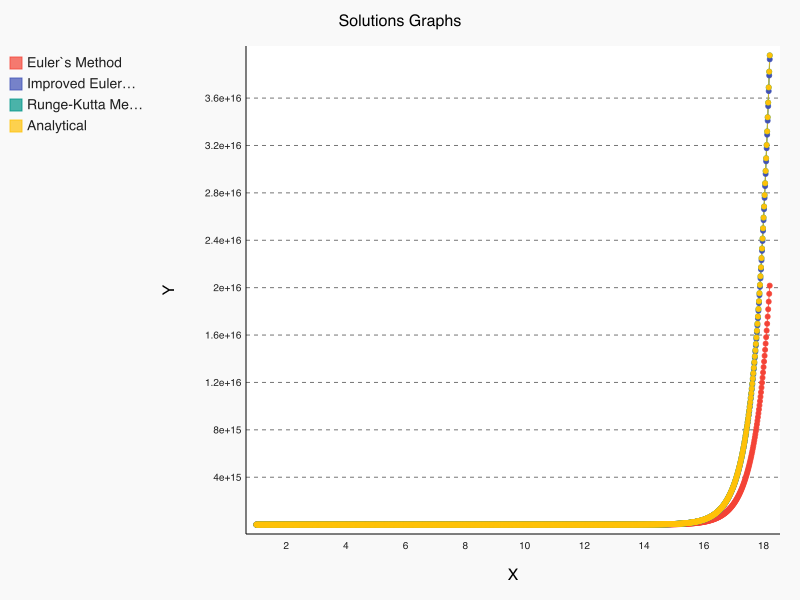

In [8]:
xy_chart = pygal.XY()
xy_chart.title = 'Solutions Graphs'
xy_chart.x_title = "X"
xy_chart.y_title = "Y"
xy_chart.add('Euler`s Method', [(x, y) for x, y in zip(*calc_euler(func, x_0, y_0, x_end, N))])
xy_chart.add('Improved Euler`s Method', [(x, y) for x, y in zip(*calc_improved_euler(func, x_0, y_0, x_end, N))])
xy_chart.add('Runge-Kutta Method', [(x, y) for x, y in zip(*calc_runge_kutta(func, x_0, y_0, x_end, N))])
xy_chart.add('Analytical', [(x, y) for x, y in zip(*calc_analytical(y_sol, x_0, y_0, x_end, N))])

# HTML('<embed src={}></embed>'.format(xy_chart.render_data_uri()))

# We can see that Analytical and Runge-Kutta solution is identical

## Errors Grpahs

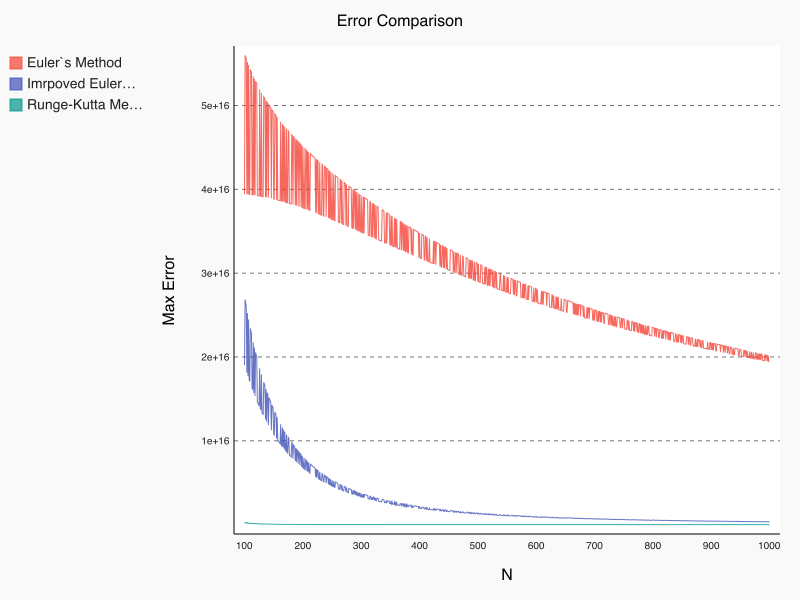

In [9]:
xy_chart = pygal.XY()
xy_chart.title = 'Error Comparison'
xy_chart.x_title = 'N'
xy_chart.y_title = 'Max Error'

xy_chart.add('Euler`s Method', [(N, max_error) for N, max_error in max_error_e], show_dots=False)
xy_chart.add('Imrpoved Euler`s Method', [(N, max_error) for N, max_error in max_error_ie], show_dots=False)
xy_chart.add('Runge-Kutta Method', [(N, max_error) for N, max_error in max_error_rk], show_dots=False)

# HTML('<embed src={}></embed>'.format(xy_chart.render_data_uri()))

# Max Error of Runge-Kutta too small